In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Path to the dataset
train_fake_path = '../dataset/train/Fake'
train_genuine_path = '../dataset/train/Genuine'
test_fake_path = '../dataset/test/Fake'
test_genuine_path = '../dataset/test/Genuine'

# Assuming all images have the same size, adjust if necessary
img_size = (128, 128)

# Load and preprocess images
def load_and_preprocess(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
        images.append(img_array)
        labels.append(label)
    return images, labels

train_fake_images, train_fake_labels = load_and_preprocess(train_fake_path, 0)  # Assuming 0 for fake
train_genuine_images, train_genuine_labels = load_and_preprocess(train_genuine_path, 1)  # Assuming 1 for genuine

test_fake_images, test_fake_labels = load_and_preprocess(test_fake_path, 0)
test_genuine_images, test_genuine_labels = load_and_preprocess(test_genuine_path, 1)

# Concatenate fake and genuine data
X_train = np.concatenate([train_fake_images, train_genuine_images], axis=0)
y_train = np.concatenate([train_fake_labels, train_genuine_labels], axis=0)

X_test = np.concatenate([test_fake_images, test_genuine_images], axis=0)
y_test = np.concatenate([test_fake_labels, test_genuine_labels], axis=0)

# Convert to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Split the dataset into training and testing sets
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


model.save('../output/logo_detection_model.h5')





Epoch 1/10
14/14 [==============================] - 5s 315ms/step - loss: 0.8798 - accuracy: 0.5938 - val_loss: 0.6310 - val_accuracy: 0.6698
Epoch 2/10
14/14 [==============================] - 4s 292ms/step - loss: 0.6511 - accuracy: 0.6580 - val_loss: 0.6072 - val_accuracy: 0.6698
Epoch 3/10
14/14 [==============================] - 4s 276ms/step - loss: 0.5838 - accuracy: 0.6485 - val_loss: 0.5194 - val_accuracy: 0.6509
Epoch 4/10
14/14 [==============================] - 4s 284ms/step - loss: 0.5440 - accuracy: 0.6722 - val_loss: 0.5269 - val_accuracy: 0.6226
Epoch 5/10
14/14 [==============================] - 4s 274ms/step - loss: 0.5252 - accuracy: 0.6746 - val_loss: 0.5253 - val_accuracy: 0.6509
Epoch 6/10
14/14 [==============================] - 4s 277ms/step - loss: 0.5169 - accuracy: 0.7007 - val_loss: 0.5335 - val_accuracy: 0.5755
Epoch 7/10
14/14 [==============================] - 4s 306ms/step - loss: 0.5076 - accuracy: 0.6960 - val_loss: 0.5280 - val_accuracy: 0.6132
Epoch 

c:\Users\Tarun Samala\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 55ms/step


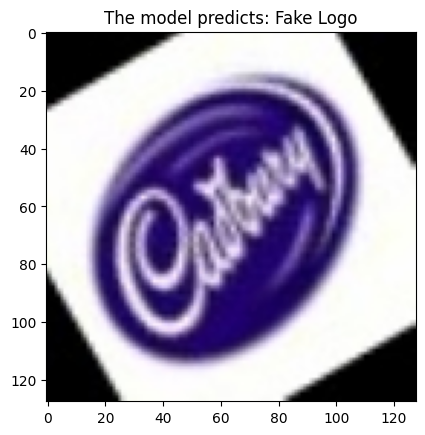

The model predicts: Fake Logo


In [6]:
loaded_model = load_model('../output/logo_detection_model.h5')


def predict_logo(image_path, model):

    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    input_image = np.expand_dims(img_array, axis=0)  


    prediction = model.predict(input_image)
    predicted_class = np.round(prediction)[0][0]
    
    plt.imshow(img)
    plt.title(f'The model predicts: {result}')
    plt.show()

  
    if predicted_class == 0:
        return "Fake Logo"
    else:
        return "Genuine Logo"
    
       



random_image_path = '../dataset/test/Fake/000001_4af57d3130914c77855af48f705c9396.jpg' 
result = predict_logo(random_image_path, loaded_model)

print(f'The model predicts: {result}')